In [3]:
import pandas as pd
import plotly.express as px
import seaborn as sns

import tlp

# Importing

In [1]:
stats = tlp.stats.read_cheap_statistics()
diameters = tlp.stats.get_diameter()
average_path = tlp.stats.get_average_shortest_simple_path_length()
scores = tlp.read_auc_from_logistic_regression()
labels = tlp.recursive_file_loading('label.txt')
categories = tlp.get_categories()

NameError: name 'tlp' is not defined

In [5]:
scores_time_agnostic = tlp.read_auc_from_logistic_regression('auc_time_agnostic.float')

# Table

In [6]:
df = pd.DataFrame.from_dict(stats, orient='index')
df['diameter'] = pd.Series(diameters)
df['label'] = pd.Series(labels)
df['average path length'] = pd.Series(average_path)
df['score'] = pd.Series(scores)
df['score time agnostic'] = pd.Series(scores_time_agnostic)
df['categories'] = pd.Series(categories)
df = df.reset_index()
print(df.columns)
cols = [
  'index', 'edges', 'nodes', 'avg events per pair', 'density (nx.Graph)', 
  'degree assortativity (nx.Graph)', 'average clustering coefficient',
  'diameter', 'label', 'average path length', 'score', 'categories',
  'score time agnostic'
]
df = df[cols]
df.rename(columns={'density (nx.Graph)': '⌀', 'degree assortativity (nx.Graph)': 'd.a.'}, inplace=True)

Index(['index', 'edges', 'density (nx.MultiGraph)', 'fraction edges in GC',
       'nodes', 'avg events per pair', 'density (nx.Graph)',
       'degree assortativity (nx.Graph)', 'average clustering coefficient',
       'fraction nodes in GC', 'avg events per pair in GC', 'diameter',
       'label', 'average path length', 'score', 'score time agnostic',
       'categories'],
      dtype='object')


In [48]:
df[df['avg events per pair'] < 1.2]['score'].agg(['mean', 'std'])

mean    0.848333
std     0.088863
Name: score, dtype: float64

In [50]:
df[df['avg events per pair'] < 1.2]['score time agnostic'].agg(['mean', 'std'])

mean    0.703333
std     0.111116
Name: score time agnostic, dtype: float64

In [49]:
df[df['avg events per pair'] > 1.2]['score'].agg(['mean', 'std'])

mean    0.888333
std     0.061763
Name: score, dtype: float64

In [51]:
df[df['avg events per pair'] > 1.2]['score time agnostic'].agg(['mean', 'std'])

mean    0.799444
std     0.069237
Name: score time agnostic, dtype: float64

# Plots

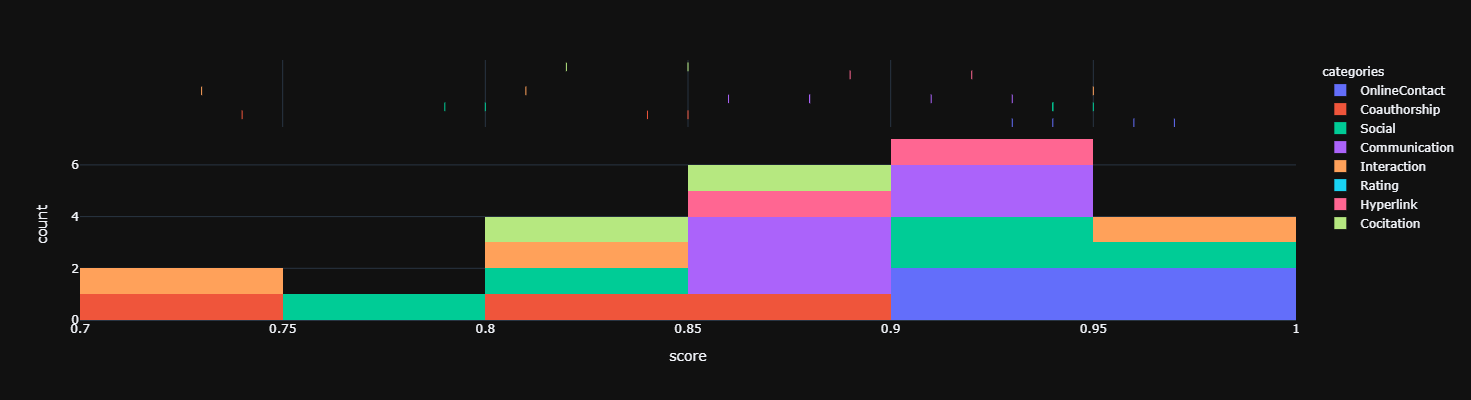

In [29]:
px.histogram(df, x='score', marginal='rug', hover_name='label', hover_data=['index'], color='categories', width=600, height=400, template='plotly_dark')

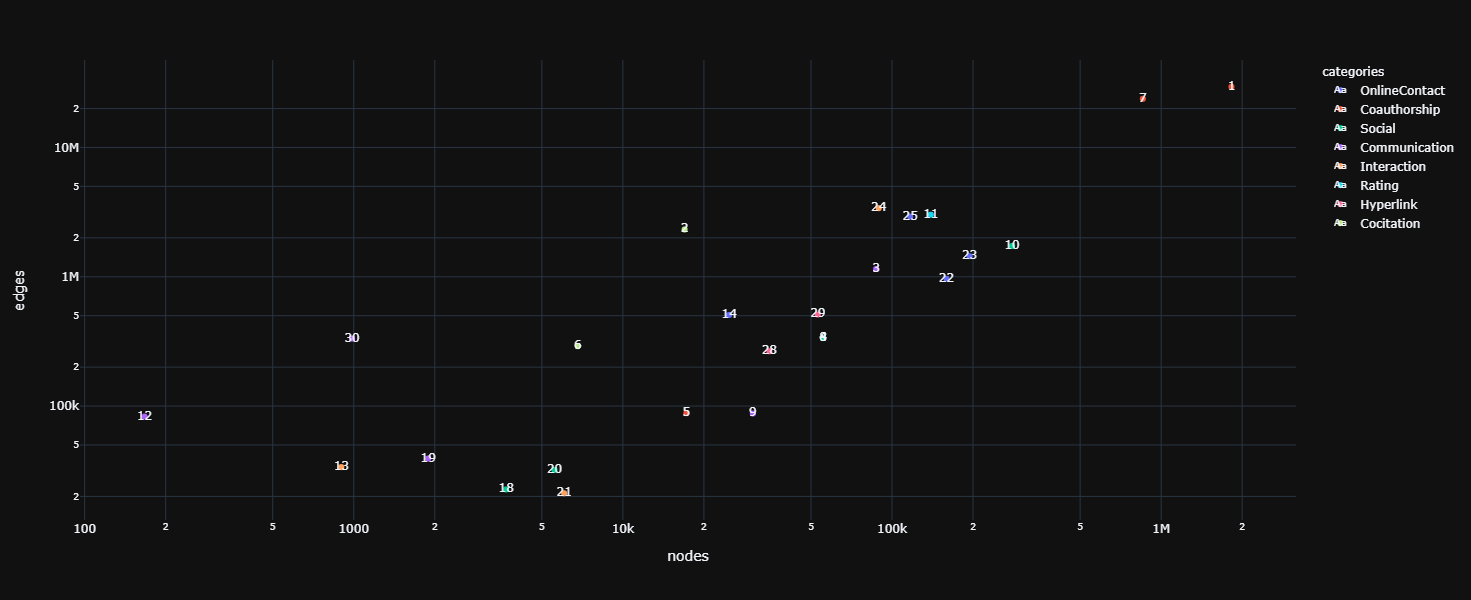

In [9]:
fig = df.plot.scatter(
  x='nodes', y='edges', backend='plotly', text='index', color='categories',
  hover_name='label', hover_data={'index': True, 'edges': ':,', 'nodes': ':,'}, 
  log_x=True, log_y=True, width=600, height=600, template='plotly_dark')
fig.update_layout(hovermode="closest")
fig

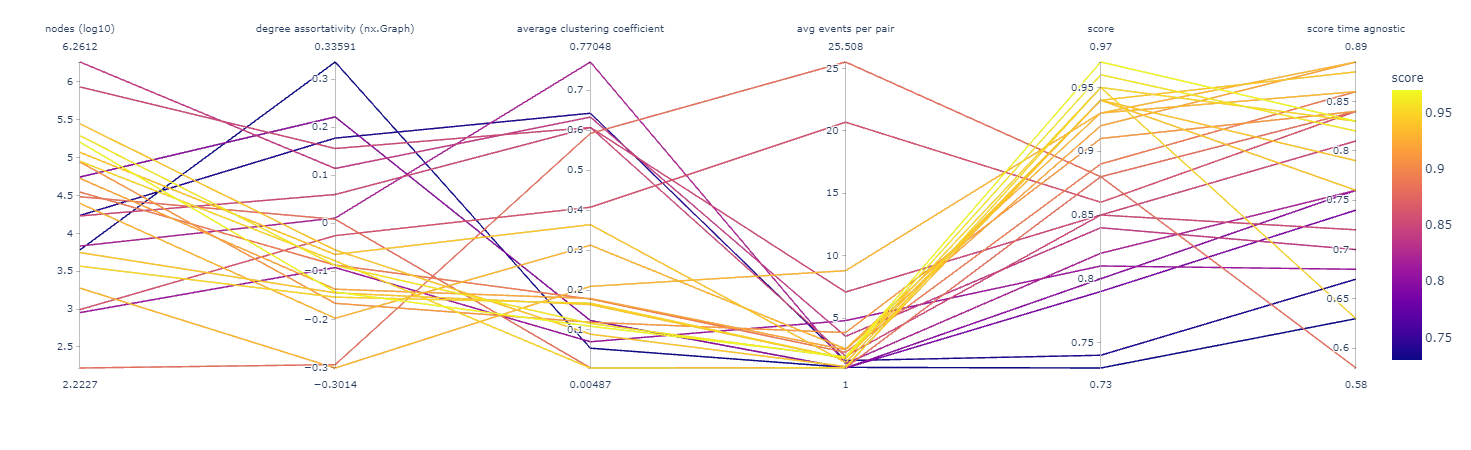

In [10]:
import numpy as np
px.parallel_coordinates(
  df[df['score'].notna()], color='score', 
  dimensions=[
    np.log10(df[df['score'].notna()]['nodes']), 
    'degree assortativity (nx.Graph)', 
    'average clustering coefficient',
    'avg events per pair',
    'score',
    'score time agnostic'
  ], labels={
    'dimensions_0': 'nodes (log10)',
  })

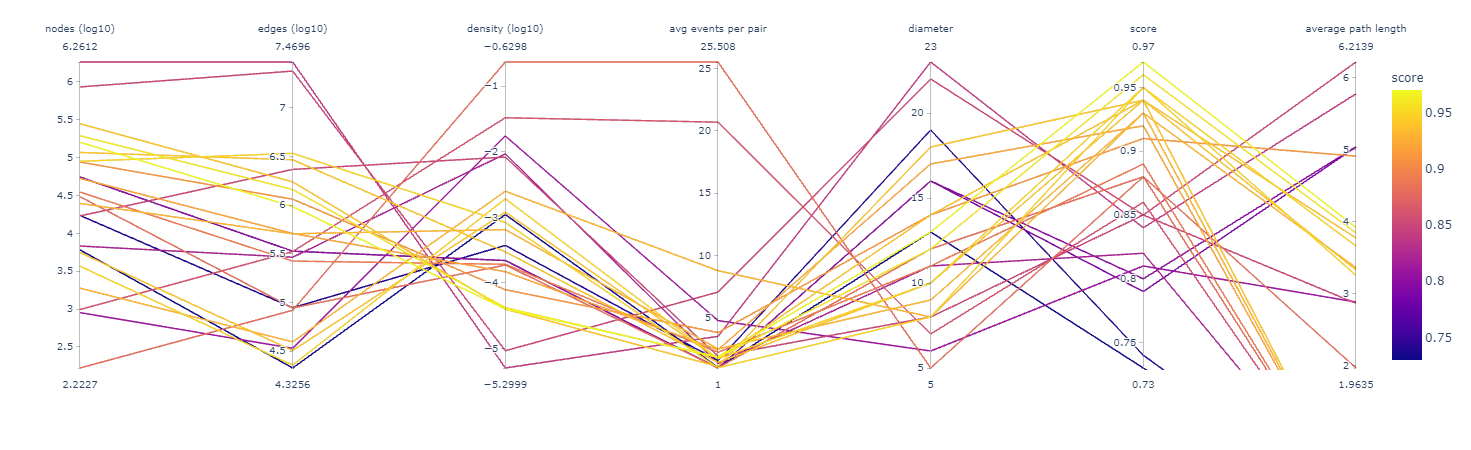

In [28]:
import numpy as np
px.parallel_coordinates(
  df[df['score'].notna()], color='score', 
  dimensions=[
    np.log10(df[df['score'].notna()]['nodes']), 
    np.log10(df[df['score'].notna()]['edges']), 
    np.log10(df[df['score'].notna()]['density (nx.Graph)']), 
    'avg events per pair', 
    'diameter',
    'score',
    'average path length'
  ], labels={
    'dimensions_0': 'nodes (log10)',
    'dimensions_1': 'edges (log10)',
    'dimensions_2': 'density (log10)'
  }
)

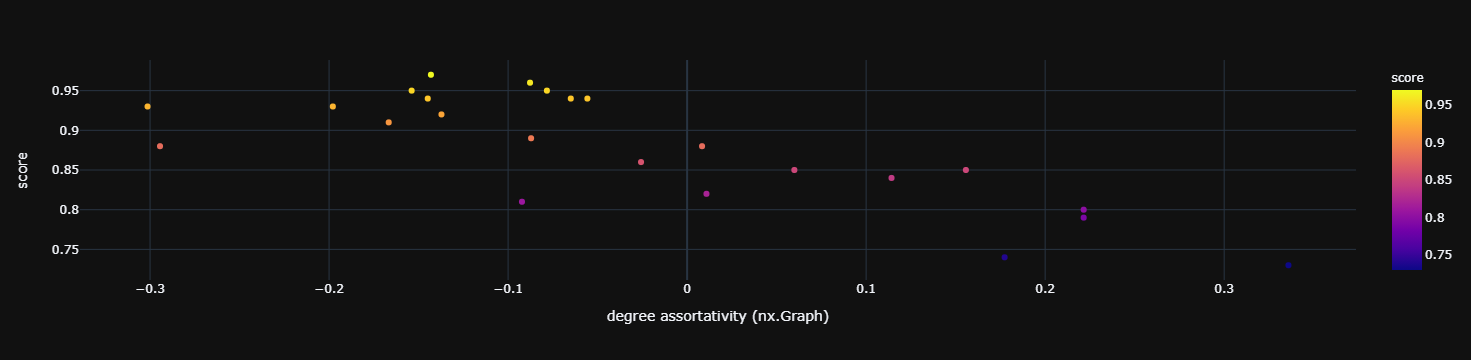

In [37]:
px.scatter(df[df['score'].notna()], x='degree assortativity (nx.Graph)', y='score', color='score', height=200, template='plotly_dark', hover_name='label')

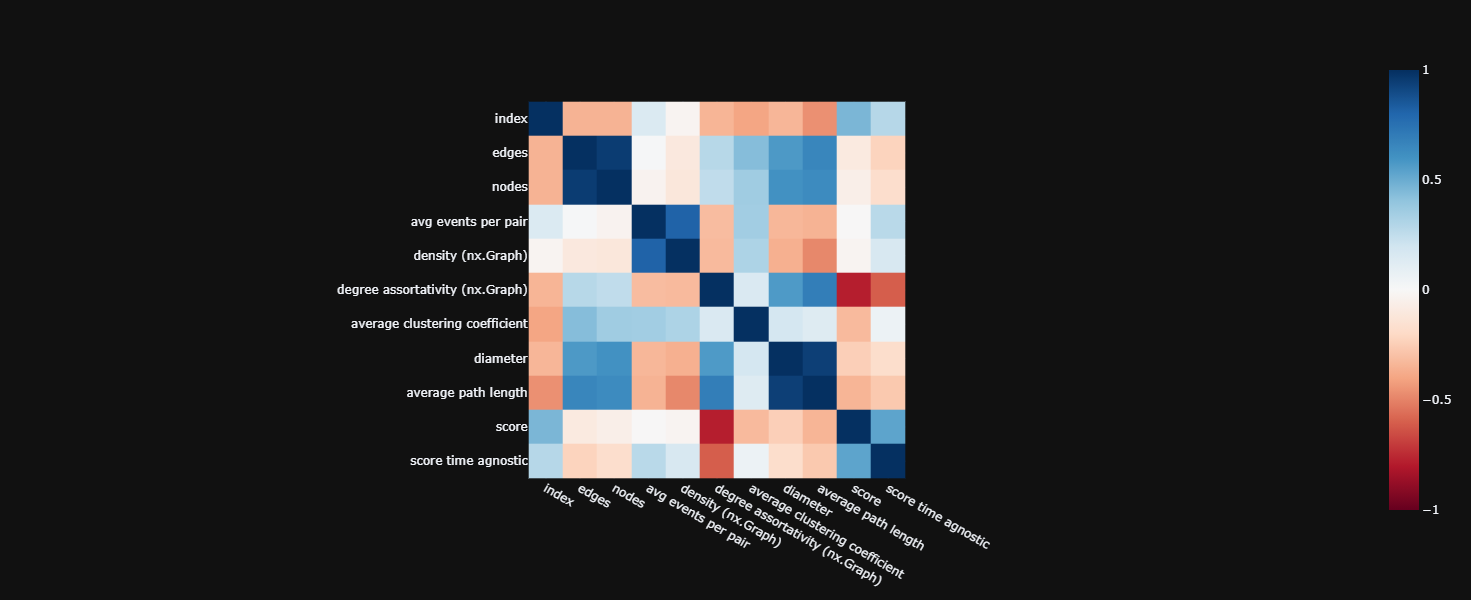

In [25]:
px.imshow(df.corr(), height=600, width=600, zmin=-1, zmax=1, color_continuous_midpoint=0, color_continuous_scale='RdBu', template='plotly_dark')

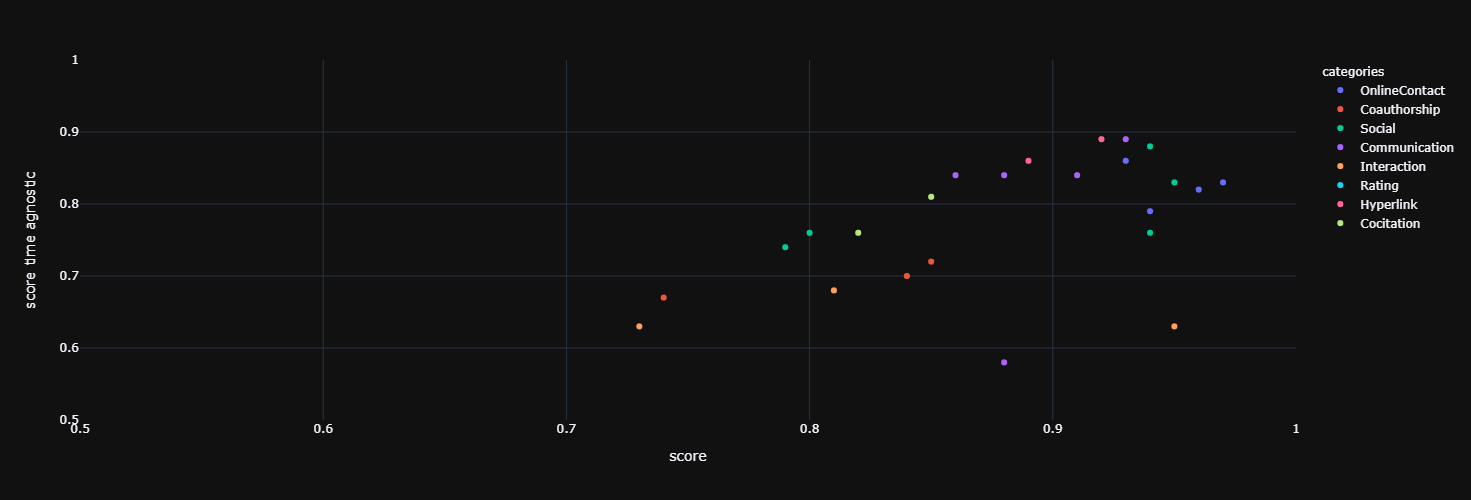

In [44]:
px.scatter(df, x='score', y='score time agnostic', color='categories', height=500, width=600, hover_name='label', hover_data=['index'], template='plotly_dark', range_x=(.5, 1), range_y=(.5,1))